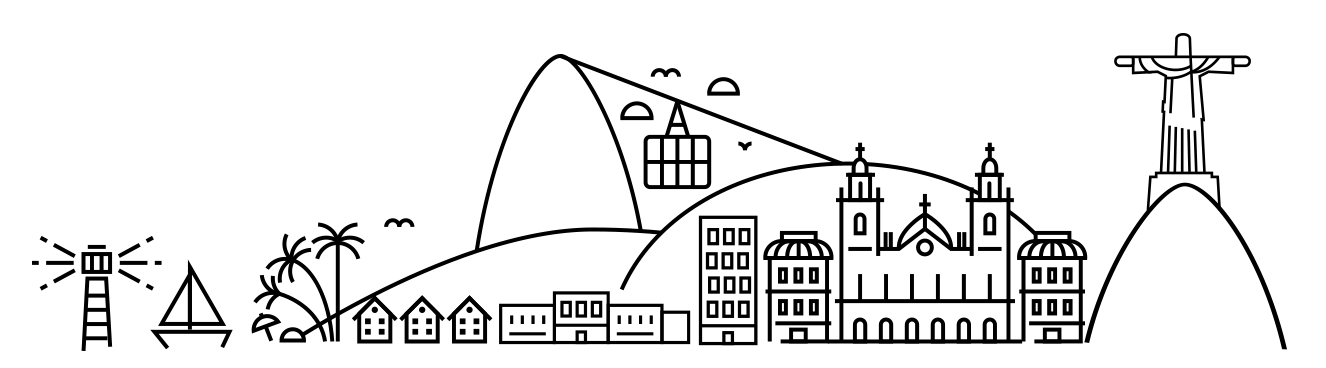

# Desafio Técnico - Cientista de Dados Júnior | Nayara Valevskii
#### Base de Dados - basedosdados
#### Tabelas - Chamados 1746, Bairros RJ e Eventos.



---



### **Instalando a biblioteca** ``basedosdados`` e atualizando as versões das bibliotecas do google.

In [ ]:
!pip install google-cloud-bigquery==2.30.1

In [ ]:
!pip install google-cloud-bigquery-storage==1.1.0

In [ ]:
!pip install google-cloud-storage==1.42.3

In [ ]:
!pip install google-cloud-core==2.4.1

In [ ]:
!pip install basedosdados



> A biblioteca "Base dos Dados" é um pacote Python que facilita o acesso e a utilização de dados públicos disponíveis no repositório de dados da Prefeitura do Rio de Janeiro. Este pacote oferece diversas funções para listar conjuntos de dados disponíveis, obter informações sobre tabelas e carregar dados diretamente no pandas, entre outras funcionalidades. É mantido no Google BigQuery.

### **Importando os Pacotes**

In [41]:
#Importa pacotes
import basedosdados as bd
import pandas as pd
import numpy as np


### **Realizando as consultas nas Tabelas e Transformando em Dataframe**


Realizando a consulta da tabela ``chamados1746``, do período 01/01/2022 à 02/01/2024 e armazenando em um dataframe ``df_chamados``



In [ ]:
query = "SELECT * FROM `datario.administracao_servicos_publicos.chamado_1746` WHERE data_inicio >= '2022-01-01' AND data_inicio < '2024-01-02';"
df_chamados = bd.read_sql(query, billing_project_id="testedatario", reauth = True)
df_chamados.head(2)

Realizando a consulta da tabela ``bairros`` e armazenando em um dataframe ``df_bairros``

In [ ]:
query = "SELECT * FROM `datario.dados_mestres.bairro`"
df_bairros = bd.read_sql(query, billing_project_id="testedatario", reauth = True)
df_bairros.head(2)

Realizando a consulta da tabela ``rede_hoteleira_ocupacao_eventos`` e armazenando em um dataframe ``df_rede_hoteleira``

In [ ]:
#Query Rede Hoteleira.
query = "SELECT * FROM `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos`"
df_eventos = bd.read_sql(query, billing_project_id="testedatario", reauth = True)
df_eventos.head()


> **Consulta SQL (query):** A variável query contém uma string que define uma consulta SQL. Esta consulta seleciona todas as colunas (SELECT *) das tabelas ```datario.administracao_servicos_publicos.chamado_1746```, ```datario.dados_mestres.bairro``` e ```datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos```. A seleção da tabela chamados é filtrada para incluir apenas as entradas onde a data_inicio está entre 2022-01-01 e antes de 2024-01-02 (ultima data posterior do período da consulta da tabela de eventos). Em outras palavras, busca todos os registros de chamados ou serviços públicos iniciados no dia 1º de janeiro de 2022.


> **Execução da consulta (bd.read_sql):** O método bd.read_sql é chamado com a consulta SQL (query) e um identificador do projeto de cobrança (billing_project_id="testedatario"), além de um parâmetro reauth definido como True, que indica a necessidade de reautenticação para acesso ao banco de dados. Este método está sendo usado para enviar a consulta ao banco de dados e obter os resultados. A variável bd representa uma conexão com o banco de dados.


> **Exibição dos resultados (df_chamados.head(2)):** O resultado das consultas são armazenados nas variáveis ```df_chamados```,```df_bairros```,```df_eventos``` , que são DATAFRAMES. O método head(2) é chamado no DataFrame resultante, que retorna as primeiras duas linhas do DataFrame, afim de consultar rapidamente os dados.


## **RESPOSTAS DE 01 A 05 | TABELA DE CHAMADOS 1746 E A TABELA DE BAIRROS RJ**




1. Quantos chamados foram abertos no dia 01/04/2023?


In [45]:
# Filtrando os dados.
chamados_filtrados = df_chamados[(df_chamados['data_inicio'] >= '2023-04-01') & (df_chamados['data_inicio'] < '2023-04-02')]

# Contando o número total de chamados que satisfazem as condições de filtro
total_chamados = chamados_filtrados.shape[0]

print(f'Total de chamados no dia 01/04/2023 são: {total_chamados}')

Total de chamados no dia 01/04/2023 são: 73


```Resposta:``` Foram aberto 73 chamados em 01/04/2023

2. Qual o tipo de chamado que teve mais reclamações no dia 01/04/2023?

In [46]:
# Já temos um df com os chamados_filtrados para este dia, vamos dar sequencia ao código.

# Agrupando os dados filtrados por 'tipo', contando os id_chamado e renomeando a coluna resultante para 'numero_de_reclamacoes'
chamados_agrupados = chamados_filtrados.groupby('tipo')['id_chamado'].count().reset_index(name='numero_de_reclamacoes')

# Ordenando os resultados em ordem decrescente de 'numero_de_reclamacoes' e pegando o primeiro resultado
chamados_tipo_mais_reclamacoes = chamados_agrupados.sort_values('numero_de_reclamacoes', ascending=False).head(1)

print(f': {chamados_tipo_mais_reclamacoes}')

:                tipo  numero_de_reclamacoes
11  Poluição sonora                     24


```Resposta:``` Tipo Poluição Sonora com 24 ocorrências de chamados

3. Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?

In [47]:
# Já temos um df com os chamados_filtrados para este dia, vamos dar sequencia ao código.

# Realizando o join entre os DataFrames df_chamados e df_bairros
chamados_bairros = pd.merge(chamados_filtrados, df_bairros, on='id_bairro')

# Agrupando os resultados pelo nome do bairro, contando os id_chamado e renomeando a coluna resultante
agrupados = chamados_bairros.groupby('nome')['id_chamado'].count().reset_index(name='numero_de_chamados')

# Ordenando os resultados em ordem decrescente de 'numero_de_chamados' e pegando os três primeiros resultados
top_bairros = agrupados.sort_values('numero_de_chamados', ascending=False).head(3)

print(top_bairros)

                 nome  numero_de_chamados
10  Engenho de Dentro                   8
3        Campo Grande                   6
20             Leblon                   6


```Resposta:``` Bairros Engenho de Dentro com 8 chamados, Leblon com 6 chamados e Campo Grande com 6 chamados

4. Qual o nome da subprefeitura com mais chamados abertos nesse dia?

In [48]:
# Já temos um df com os chamados_filtrados para este dia, vamos dar sequencia ao código.

# Realizando o join entre os DataFrames df_chamados e df_bairros usando a coluna 'id_bairro' como chave
chamados_bairros = pd.merge(chamados_filtrados, df_bairros, on='id_bairro')

# Agrupando os resultados pela subprefeitura, contando os id_chamado e renomeando a coluna resultante
agrupados = chamados_bairros.groupby('subprefeitura')['id_chamado'].count().reset_index(name='numero_de_chamados')

# Ordenando os resultados em ordem decrescente de 'numero_de_chamados' e pegando o primeiro resultado
subprefeitura_mais_chamados = agrupados.sort_values('numero_de_chamados', ascending=False).head(1)

print(subprefeitura_mais_chamados)

  subprefeitura  numero_de_chamados
5    Zona Norte                  25


```Resposta:``` Subprefeitura Zona Norte com 25 chamados

5. Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim,por que isso acontece?

In [49]:
# Realizando o left join entre os DataFrames df_chamados e df_bairros
chamados_bairros = pd.merge(df_chamados, df_bairros, on='id_bairro', how='left')

# Filtrando os chamados pelo intervalo de datas
chamados_filtrados_bairros = chamados_bairros[
    (chamados_bairros['data_inicio'] >= '2023-04-01') &
    (chamados_bairros['data_inicio'] < '2023-04-02')
]

# Identificando chamados sem id_bairro ou com subprefeitura ausente (NaN)
chamados_sem_bairro_ou_subpref = chamados_filtrados_bairros[
    chamados_filtrados_bairros['id_bairro'].isna() | chamados_filtrados_bairros['subprefeitura'].isna()
]

# Convertendo para dicionário
chamados_dict = chamados_sem_bairro_ou_subpref.to_dict()

# Supondo que queremos extrair o primeiro 'tipo' e 'subtipo' desses chamados, se existirem
if chamados_dict:
    resultado = {
        'tipo': list(chamados_dict['tipo'].values())[0] if 'tipo' in chamados_dict else None,
        'subtipo': list(chamados_dict['subtipo'].values())[0] if 'subtipo' in chamados_dict else None
    }
    print(resultado)
else:
    print("Nenhum registro encontrado.")


{'tipo': 'Ônibus', 'subtipo': 'Verificação de ar condicionado inoperante no ônibus'}


``Resposta:`` Alguns tipos de chamados,como os relacionados a ônibus,táxis ou BRT,podem ser associados a serviços que operam em múltiplas localidades ou em rotas específicas que não estão restritas a um único bairro. Portanto, pode não ser necessário associá-los a um bairro específico.

## **RESPOSTAS DE 06 A 10 | TABELA DE CHAMADOS 1746 E A TABELA DE OCUPAÇÃO HOTELEIRA G. EVENTOS RIO |PERTUBAÇÃO E SOSSEGO**

6. Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?

In [51]:
# Certificando-se de que a coluna 'data_inicio' está no formato de data correto
df_chamados['data_inicio'] = pd.to_datetime(df_chamados['data_inicio'])

# Filtrando os registros com o subtipo "Perturbação do sossego" dentro do intervalo de datas especificado
chamados_filtrados = df_chamados.loc[
    (df_chamados['subtipo'] == "Perturbação do sossego") &
    (df_chamados['data_inicio'] >= pd.Timestamp("2022-01-01 00:00:00")) &
    (df_chamados['data_inicio'] < pd.Timestamp("2023-12-31 00:00:00"))
]

# Contando o número total de chamados que satisfazem as condições de filtro
numero_de_chamados = chamados_filtrados.shape[0]

print(f'Número de chamados: {numero_de_chamados}')


Número de chamados: 42408


```Resposta:``` Total de 42408 chamados com subtipo Pertubação e Sossego

7. Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon,Carnaval e Rock in Rio).

In [ ]:
# Filtro inicial por subtipo e intervalo de datas
df_chamado_perturbacao = df_chamados.query('subtipo == "Perturbação do sossego" & "2022-01-01 00:00:00" <= data_inicio < "2024-01-01 00:00:00"').sort_values(by=["data_inicio"])

# Cross join com DataFrame de eventos
df_merge = df_chamado_perturbacao.reset_index().assign(key=1).merge(df_eventos.assign(key=1), on='key').drop('key', axis=1)

# Filtragem final baseada nas datas de início dos chamados e intervalo dos eventos
df_chamado_eventos = df_merge[df_merge['data_inicio'].between(pd.to_datetime(df_merge['data_inicial']), pd.to_datetime(df_merge['data_final']) + pd.Timedelta(days=1))]

# Exibição do DataFrame resultante
print(df_chamado_eventos)




```Resposta:``` Total de 1212 chamados com subtipo Pertubação e Sossego,nos períodos do Reveillon,Carnaval e Rock in Rio, conforme as datas da tabela de eventos

8. Quantos chamados desse subtipo foram abertos em cada evento?

In [63]:
#Agrupando os eventos e totalizando as chamadas
display(df_chamado_eventos.groupby(['evento'])['evento'].count().sort_values(ascending=False))

evento
Rock in Rio    834
Carnaval       241
Reveillon      137
Name: evento, dtype: int64

```Resposta:``` Total de 834 chamados no evento Rock in Rio; Total de 241 chamados no evento Carnaval; Total de 137 chamados no evento Reveillon.

9. Qual evento teve a maior média diária de chamados abertos desse subtipo?

In [61]:
#Agrupando os eventos e calculando a média.
df_chamado_eventos.groupby(['evento', pd.Grouper(key='data_inicio', freq='D')]).size().groupby('evento').mean()

evento
Carnaval        60.250000
Reveillon       45.666667
Rock in Rio    119.142857
dtype: float64

```Resposta:``` O evento com maior média diária foi o Rock in Rio, com uma média de 119,14 chamados.

10. Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos (Reveillon,Carnaval e Rock IN Rio) e a média diária de chamados abertos desse subtipo considerando todo o período de 01/01/2022 até 31/12/2023.

In [64]:
df_chamado_perturbacao.shape[0] / ((pd.to_datetime('2024-01-01') - pd.to_datetime('2022-01-01')).days)

58.09315068493151

```Resposta:``` Os eventos possuem uma média diária de chamados de:
<br/>
       Evento    | Média Diária | Média Total | Percentual de Variação
    ------------------------------------------------------------------
      Rock in Rio | 119,14       | 58,09       | +105,09%
      Carnaval    | 60,25        | 58,09       | +3,72%
      Reveillon   | 45,67        | 58,09       | -21,38%
<br/>

A média diária de chamados por Pertubação e Sossego no período de 01/01/2022 a 31/12/2023 foi de 58,09 chamados.
